# Data Preparation Basics
## Part 2 - Treating missing values

In [2]:
import numpy as np
import pandas as pd

### Figuring out what data is missing

In [3]:
# NaN is short for Not a number. It is used to represent entries that are undefined. It is also used for representing missing values in a dataset
missing = np.nan

series_obj = pd.Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
print(series_obj)

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object


In [4]:
# Test if there are any null values
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

### Filling in for missing values

In [5]:
# Produce random values and shape the result in 6x6 matrix
np.random.seed(25)
DF_obj = pd.DataFrame(np.random.rand(36).reshape(6, 6))
print(DF_obj)

          0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366  0.113041
2  0.447031  0.585445  0.161985  0.520719  0.326051  0.699186
3  0.366395  0.836375  0.481343  0.516502  0.383048  0.997541
4  0.514244  0.559053  0.034450  0.719930  0.421004  0.436935
5  0.281701  0.900274  0.669612  0.456069  0.289804  0.525819


In [6]:
# Add missing data
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366       NaN
2  0.447031  0.585445  0.161985  0.520719  0.326051       NaN
3       NaN  0.836375  0.481343  0.516502  0.383048       NaN
4       NaN  0.559053  0.034450  0.719930  0.421004       NaN
5       NaN  0.900274  0.669612  0.456069  0.289804  0.525819

In [25]:
# Fill out missing data with zeros
#filled_DF = DF_obj.fillna(0.5)
#filled_DF
#-------------------------
# Fill the missing values with 0.5 instead of 0
#filled_DF2 = DF_obj.fillna(0.5)
#filled_DF2
#-------------------------
# Fil out missing data in column 0
DF_obj[0] = DF_obj[0].replace(0, 0.5)
DF_obj

0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366       NaN
2  0.447031  0.585445  0.161985  0.520719  0.326051       NaN
3  0.500000  0.836375  0.481343  0.516502  0.383048       NaN
4  0.500000  0.559053  0.034450  0.719930  0.421004       NaN
5  0.500000  0.900274  0.669612  0.456069  0.289804  0.525819

In [ ]:
# Fill out missing data in column 0 with 0.1 and column 5 with 1.25
filled_DF = DF_obj.fillna({0: 0.1, 5:1.25})
filled_DF

0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366  1.250000
2  0.447031  0.585445  0.161985  0.520719  0.326051  1.250000
3  0.100000  0.836375  0.481343  0.516502  0.383048  1.250000
4  0.100000  0.559053  0.034450  0.719930  0.421004  1.250000
5  0.100000  0.900274  0.669612  0.456069  0.289804  0.525819

In [32]:
# Fill out missing data with forward fill method
fill_DF = DF_obj.fillna(method='ffill')
fill_DF
# Try replace it with backward fill (bfill) and compare the answer
# A: Bfill fills missing values with the previous values

0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366  0.117376
2  0.447031  0.585445  0.161985  0.520719  0.326051  0.117376
3  0.500000  0.836375  0.481343  0.516502  0.383048  0.117376
4  0.500000  0.559053  0.034450  0.719930  0.421004  0.117376
5  0.500000  0.900274  0.669612  0.456069  0.289804  0.525819

### Counting missing values

In [ ]:
np.random.seed(25)
DF_obj = pd.DataFrame(np.random.rand(36).reshape(6,6))
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366       NaN
2  0.447031  0.585445  0.161985  0.520719  0.326051       NaN
3       NaN  0.836375  0.481343  0.516502  0.383048       NaN
4       NaN  0.559053  0.034450  0.719930  0.421004       NaN
5       NaN  0.900274  0.669612  0.456069  0.289804  0.525819

In [ ]:
# Counting missing data
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

### Filtering out missing values

In [ ]:
# Drop all the raws with missing values
DF_no_NaN = DF_obj.dropna()
DF_no_NaN

0         1         2         3       4         5
0  0.870124  0.582277  0.278839  0.185911  0.4111  0.117376

In [35]:
# Drop all the column with missing values
DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

# Find out what axis=1 means?
# A: 'axis=1' highlights the columns in the dataframe, while 'axis=0' highlights the rows of the dataframe

0         1         2         3         4
0  0.870124  0.582277  0.278839  0.185911  0.411100
1  0.684969  0.437611  0.556229  0.367080  0.402366
2  0.447031  0.585445  0.161985  0.520719  0.326051
3  0.500000  0.836375  0.481343  0.516502  0.383048
4  0.500000  0.559053  0.034450  0.719930  0.421004
5  0.500000  0.900274  0.669612  0.456069  0.289804

Tasks 1:

Create a pandas DataFrame named sales_data with the following data:

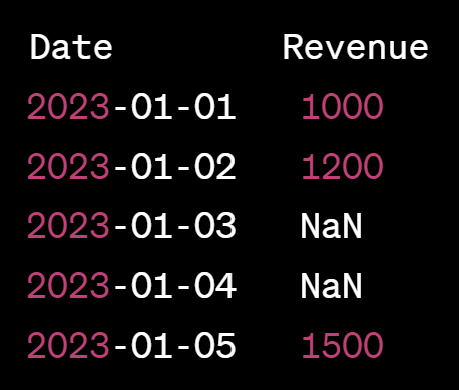


Task 2:
Fill in the missing values (NaN) in the 'Revenue' column with the value 800.

In [48]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Revenue': [1000, 1200, np.nan, np.nan, 1500]
}

sales_data = pd.DataFrame(data)
sales_data

Date  Revenue
0  2023-01-01   1000.0
1  2023-01-02   1200.0
2  2023-01-03      NaN
3  2023-01-04      NaN
4  2023-01-05   1500.0

In [49]:
#Filling missing values with 800
filled_sales = sales_data.fillna(800)
filled_sales

Date  Revenue
0  2023-01-01   1000.0
1  2023-01-02   1200.0
2  2023-01-03    800.0
3  2023-01-04    800.0
4  2023-01-05   1500.0